<a href="https://colab.research.google.com/github/elatedgorilla-art/content/blob/main/DATA_342_Fall_2025_Lab_1_Desc_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!pip install openpyxl matplotlib pandas


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import pandas as pd
import urllib.parse

file_id = '1RatOFrajyOyFmEt69TSaAZZTNT3Bjh9c'
sheet_name = 'Daily Returns 2024'
encoded_sheet_name = urllib.parse.quote_plus(sheet_name)
url = f'https://docs.google.com/spreadsheets/d/{file_id}/gviz/tq?tqx=out:csv&sheet={encoded_sheet_name}'

try:
    df = pd.read_csv(url)
    print("Successfully loaded data from Google Sheet:")
    print(df.head())
except Exception as e:
    print(f"Error loading data from Google Sheet: {e}")

Successfully loaded data from Google Sheet:
       Date Ticker  Adj. Close Daily Return
0  1/2/2024    CVS       75.03          NaN
1  1/3/2024    CVS       75.06        0.04%
2  1/4/2024    CVS       74.71       -0.47%
3  1/5/2024    CVS       75.56        1.14%
4  1/8/2024    CVS       74.87       -0.91%


In [52]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter first
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

# Clean 'Daily Return' column for CVS
cvs_df = cvs_df.dropna(subset=['Daily Return'])
cvs_df['Daily Return'] = cvs_df['Daily Return'].astype(str).str.replace('%', '', regex=False).astype(float) / 100

# Clean 'Daily Return' column for United Health
unh_df = unh_df.dropna(subset=['Daily Return'])
unh_df['Daily Return'] = unh_df['Daily Return'].astype(str).str.replace('%', '', regex=False).astype(float) / 100

In [49]:
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

In [50]:
print("\nCVS Daily Returns:")
print(cvs_df[['Date', 'Adj. Close', 'Daily Return']].head())
print("\nUnited Health Daily Returns:")
print(unh_df[['Date', 'Adj. Close', 'Daily Return']].head())


CVS Daily Returns:
        Date  Adj. Close Daily Return
0 2024-01-02       75.03          NaN
1 2024-01-03       75.06        0.04%
2 2024-01-04       74.71       -0.47%
3 2024-01-05       75.56        1.14%
4 2024-01-08       74.87       -0.91%

United Health Daily Returns:
          Date  Adj. Close Daily Return
251 2024-01-02      521.75          NaN
252 2024-01-03      524.35        0.50%
253 2024-01-04      527.63        0.63%
254 2024-01-05      519.85       -1.47%
255 2024-01-08      519.02       -0.16%


/tmp/ipython-input-4068969640.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])


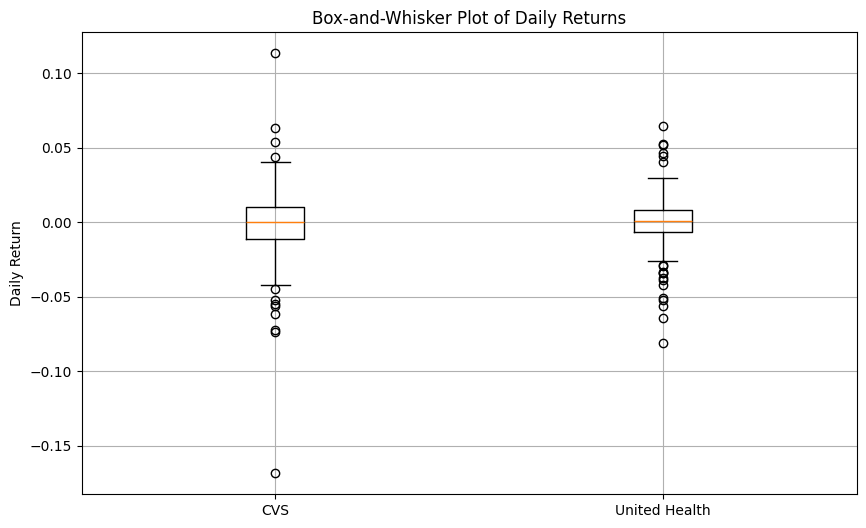

In [53]:
plt.figure(figsize=(10, 6))
plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

In [ ]:
print("CVS Daily Return column:")
print(cvs_df['Daily Return'].head())
print("\nUnited Health Daily Return column:")
print(unh_df['Daily Return'].head())
print("\nData types of Daily Return columns:")
print("CVS:", cvs_df['Daily Return'].dtype)
print("United Health:", unh_df['Daily Return'].dtype)